In [28]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import japanize_matplotlib
from itertools import combinations

In [8]:
df_e = pd.read_excel('sample_table/sampleExcel.xlsx', header=0)
df_e.head(5)

,duration,event,subgroup
0,211.634150,1,Pembro
1,53.959131,0,Pembro
2,156.279203,0,Pembro
3,301.057047,0,Pembro
4,201.144882,0,Pembro


In [9]:
style_list = ['solid', 'dashed', 'dashdot', 'dotted']

Text(0, 0.5, '生存率')

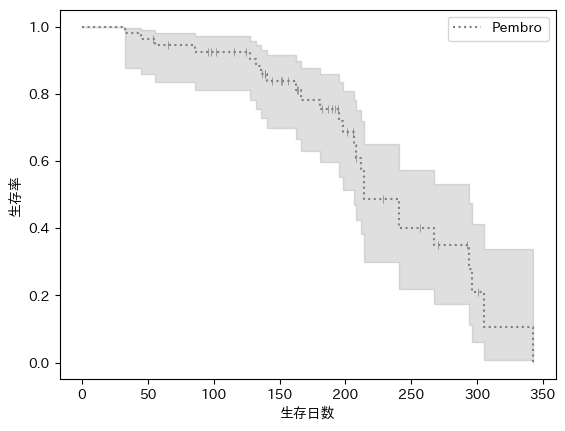

In [10]:
pem = df_e[df_e['subgroup']=='Pembro']
kmf = KaplanMeierFitter()
kmf.fit(durations=pem.duration, event_observed=pem.event, label='Pembro')
kmf.plot(show_censors=True, ci_show=True,color='gray', linestyle='dotted', censor_styles={"marker": "|", "ms": 6, "mew": 0.5})

plt.xlabel('生存日数')
plt.ylabel('生存率')

In [11]:
event = 1 - pem.event.values

<Axes: xlabel='timeline'>

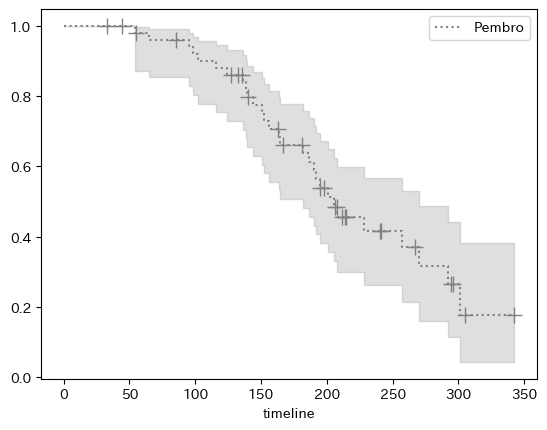

In [12]:
kmf.fit(durations=pem.duration, event_observed=event, label='Pembro')
kmf.plot(show_censors=True, ci_show=True,color='gray', linestyle='dotted')

In [13]:
subgroup = list(set(df_e.subgroup))
len(subgroup)

3

In [14]:
subgroup

['Pembro+chemo', 'chemo', 'Pembro']

In [15]:
if len(subgroup) > 0:
    plt.figure(figsize=(10, 4))
    plt.suptitle(str('Title'))

    
    
    for group in subgroup:
        df = df_e[df_e.subgroup==group]
        kmf = KaplanMeierFitter()
        kmf.fit(durations=df.duration, event_observed=df.event, label=group)
        kmf.plot(show_censors=True, ci_show=True,color='#20854EFF', linestyle=style_list[i])
    
    plt.xlabel('生存日数')
    plt.ylabel('生存率')        
    plt.plot()

NameError: name 'i' is not defined

<Figure size 1000x400 with 0 Axes>

In [16]:
lancet_cp = ['#00468BFF', '#ED0000FF', '#42B540FF', '#0099B4FF']
nejm_cp = ['#BC3C29FF', '#0072B5FF', '#E18727FF', '#20854EFF']

In [17]:
def draw_km(df:pd.DataFrame, color:str or list='gray', size=(8, 4), by_subgroup:bool=True, 
            title:str='Kaplan Meier Curve', xlabel:str='生存日数', ylabel='生存率', 
            censor:bool=True, ci:bool=False):
    
    subgroup = list(set(df_e.subgroup))
    fig, ax = plt.subplots(figsize=size)
    plt.suptitle(title)
    
    if (len(subgroup) > 0) and by_subgroup: 
        for i, group in enumerate(subgroup):
            df_ = df[df.subgroup==group]
            kmf = KaplanMeierFitter()
            kmf.fit(durations=df_.duration, event_observed=df_.event, label=group)
            if color == 'gray':  
                kmf.plot(show_censors=censor, ci_show=ci, color=color, linestyle=style_list[i], at_risk_counts=True)
            else:
                kmf.plot(show_censors=censor, ci_show=ci, color=color[i], at_risk_counts=True)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)            
        plt.plot()
                
    
    else:
        kmf = KaplanMeierFitter()
        kmf.fit(durations=df.duration, event_observed=df.event)
        if color == 'gray': 
            kmf.plot(show_censors=censor, ci_show=ci, color=color, label='_nolegend_', at_risk_counts=True)
        else:
            kmf.plot(show_censors=censor, ci_show=ci, color=color[0], label='_nolegend_', at_risk_counts=True)
            
        
        plt.gca.legend_ = None
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)     
        plt.plot()   
    
    

/Users/hiromimatsumoto/opt/anaconda3/envs/app_kmplot/lib/python3.11/site-packages/lifelines/plotting.py:964: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/Users/hiromimatsumoto/opt/anaconda3/envs/app_kmplot/lib/python3.11/site-packages/lifelines/plotting.py:964: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


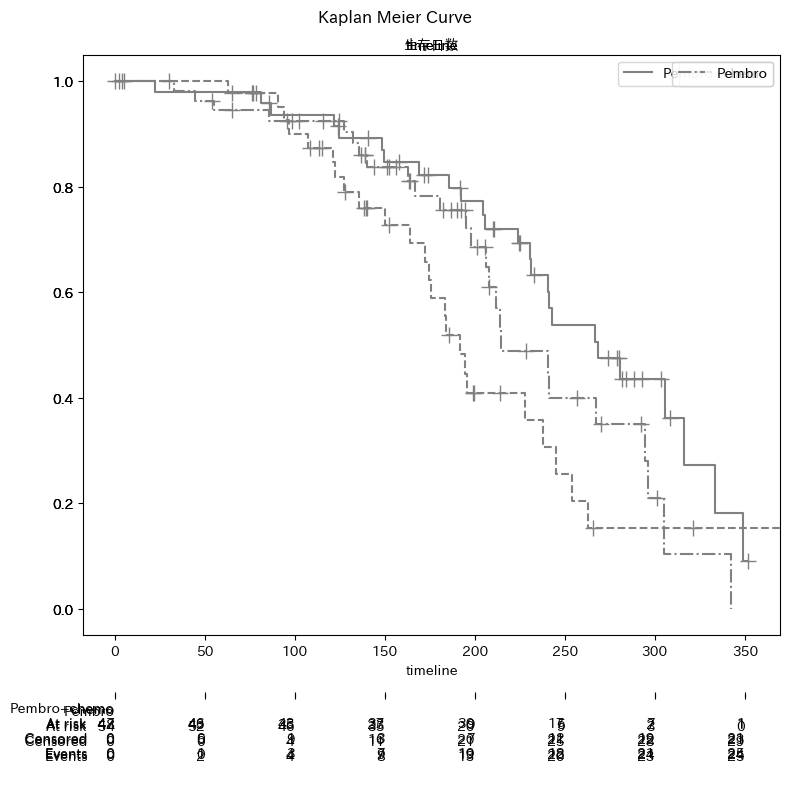

In [18]:
draw_km(df_e, by_subgroup=True, color='gray', size=(8, 8))

In [19]:
import matplotlib
matplotlib.colors.cnames

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

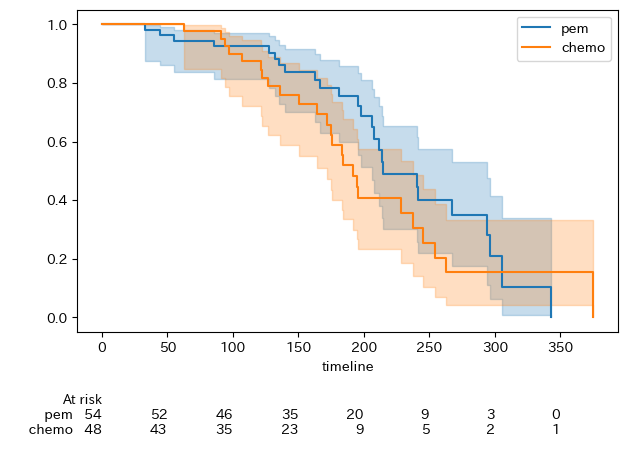

In [20]:
from lifelines.plotting import add_at_risk_counts 

pem = df_e[df_e['subgroup']=='Pembro']
chemo = df_e[df_e['subgroup']=='chemo']
 # First train some fitters and plot them
fig = plt.figure()
ax = plt.subplot(111)

f1 = KaplanMeierFitter()
f1.fit(durations=pem.duration, event_observed=pem.event, label='pem')
f1.plot(ax=ax)

f2 = KaplanMeierFitter()
f2.fit(durations=chemo.duration, event_observed=chemo.event, label='chemo')
f2.plot(ax=ax)

# # These calls below are equivalent
# add_at_risk_counts(f1, f2)
# add_at_risk_counts(f1, f2, ax=ax, fig=fig)
# plt.tight_layout()

# # This overrides the labels
# add_at_risk_counts(f1, f2, labels=['fitter one', 'fitter two'])
# plt.tight_layout()

# # This hides the labels
# add_at_risk_counts(f1, f2, labels=False)
# plt.tight_layout()

# Only show at-risk:
add_at_risk_counts(f1, f2, rows_to_show=['At risk'])
plt.tight_layout()


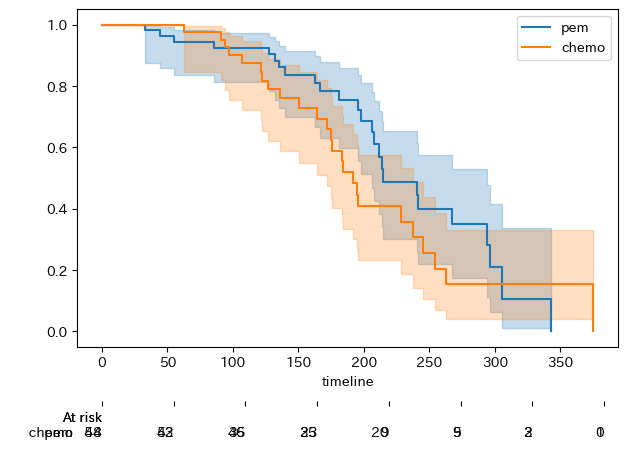

In [21]:
from lifelines.plotting import add_at_risk_counts 

pem = df_e[df_e['subgroup']=='Pembro']
chemo = df_e[df_e['subgroup']=='chemo']
 # First train some fitters and plot them
fig = plt.figure()
ax = plt.subplot(111)

f1 = KaplanMeierFitter()
f1.fit(durations=pem.duration, event_observed=pem.event, label='pem')
f1.plot(ax=ax)
add_at_risk_counts(f1, rows_to_show=['At risk'])


f2 = KaplanMeierFitter()
f2.fit(durations=chemo.duration, event_observed=chemo.event, label='chemo')
f2.plot(ax=ax)


add_at_risk_counts(f2, rows_to_show=['At risk'])

plt.tight_layout()

In [22]:
from lifelines.statistics import logrank_test
pem = df_e[df_e['subgroup']=='Pembro']
chemo = df_e[df_e['subgroup']=='chemo']
results = logrank_test(pem.duration, chemo.duration, pem.event, chemo.event)
results.p_value


0.1562104980527132

In [25]:
results = logrank_test(pem.duration, chemo.duration, pem.event, chemo.event, weightings='wilcoxon')
results.p_value

0.09806094789465891

In [31]:
from itertools import combinations
subgroup = list(set(df_e.subgroup))
subgroup_combi = list(combinations(subgroup, 2))

ps = []
names = []
for combi in subgroup_combi:
    c1 = df_e[df_e['subgroup']==combi[0]]
    c2 = df_e[df_e['subgroup']==combi[1]]
    logrank = logrank_test(c1.duration, c2.duration, c1.event, c2.event)
    p = logrank.p_value
    ps.append(p)
    names.append(combi[0]+'/'+combi[1])

    

In [32]:
ps

[0.11866493803203387, 0.1562104980527132, 0.011746567605278972]

In [33]:
names

['Pembro/Pembro+chemo', 'Pembro/chemo', 'Pembro+chemo/chemo']

In [34]:
pd.DataFrame({'subgroup':names, 'p-value':ps})

,subgroup,p-value
0,Pembro/Pembro+chemo,0.118665
1,Pembro/chemo,0.156210
2,Pembro+chemo/chemo,0.011747


In [45]:
from lifelines import CoxPHFitter
cpf = CoxPHFitter()
cpf.fit(df_e, duration_col='duration', event_col='event')


ValueError: could not convert string to float: 'chemo'

In [36]:
df_le = df_e.copy()
df_le['sub_label'] = df_le['subgroup'].apply(lambda x: subgroup.index(x) if x in subgroup else -1)

In [37]:
df_le_ = df_le.drop('subgroup', axis=1)
cph = CoxPHFitter()
cph.fit(df_le_, 'duration', 'event')

<lifelines.CoxPHFitter: fitted with 149 total observations, 74 right-censored observations>

In [38]:
cph.hazard_ratios_.item()

1.1924900903898046

In [49]:
combi = subgroup_combi[0]
df_forcox = df_e[df_e['subgroup'].apply(lambda x: x in combi)]
df_forcox['sub_label'] = df_forcox['subgroup'].apply(lambda x: combi.index(x) if x in combi else -1)
df_forcox['event_0'] = df_forcox['event'].apply(lambda x: 1-x)
df_forcox = df_forcox.drop('subgroup', axis=1)
cph = cph.fit(df_forcox, 'duration', 'event_0')

/var/folders/n0/_fvmdk1s36jfbg8f001ysjy40000gn/T/ipykernel_5653/3228641049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forcox['sub_label'] = df_forcox['subgroup'].apply(lambda x: combi.index(x) if x in combi else -1)
/var/folders/n0/_fvmdk1s36jfbg8f001ysjy40000gn/T/ipykernel_5653/3228641049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forcox['event_0'] = df_forcox['event'].apply(lambda x: 1-x)
/Users/hiromimatsumoto/opt/anaconda3/envs/app_kmplot/lib/python3.11/site-packages/lifelines/ut

In [48]:
df_forcox

,duration,event,sub_label,event_0
0,211.634150,1,0,0
1,53.959131,0,0,1
2,156.279203,0,0,1
3,301.057047,0,0,1
4,201.144882,0,0,1
...,...,...,...,...
96,348.699969,1,1,0
97,278.768439,0,1,1
98,185.556000,1,1,0
99,123.950631,0,1,1


In [50]:
cph.hazard_ratios_

covariate
event        1.622626e-09
sub_label    3.936983e-01
Name: exp(coef), dtype: float64

In [41]:
low_95 = cph.confidence_intervals_.iloc[0,0]
high_95 = cph.confidence_intervals_.iloc[0,1]

In [42]:
import numpy as np
np.exp(high_95)

1.1274874248701967

In [43]:
name = combi[1]+'/'+combi[0]

In [44]:
name

'Pembro+chemo/Pembro'

In [85]:
names = []
hrs = []
cis_low = []
cis_high = []
for combi in subgroup_combi:
    df_forcox = df_e[df_e['subgroup'].apply(lambda x: x in combi)]
    df_forcox['sub_label'] = df_forcox['subgroup'].apply(lambda x: combi.index(x) if x in combi else -1)
    df_forcox = df_forcox.drop('subgroup', axis=1)
    cph = cph.fit(df_forcox, 'duration', 'event')
    hr = cph.hazard_ratios_.item()
    ci_low = np.exp(cph.confidence_intervals_.iloc[0,0])
    ci_high = np.exp(cph.confidence_intervals_.iloc[0,1])
    name = combi[1]+'/'+combi[0]
    
    names.append(name)
    hrs.append(hr)
    cis_low.append(ci_low)
    cis_high.append(ci_high)
    df_cox = pd.DataFrame({'subgroup':names, 'HR':hrs, 
                           '95% CI(lower)':cis_low,'95% CI(upper)':cis_high})

/var/folders/n0/_fvmdk1s36jfbg8f001ysjy40000gn/T/ipykernel_59181/1065654477.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forcox['sub_label'] = df_forcox['subgroup'].apply(lambda x: combi.index(x) if x in combi else -1)
/var/folders/n0/_fvmdk1s36jfbg8f001ysjy40000gn/T/ipykernel_59181/1065654477.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forcox['sub_label'] = df_forcox['subgroup'].apply(lambda x: combi.index(x) if x in combi else -1)
/var/folders/n0/_fvmdk1s36jfbg8f001ysjy40000gn/T/ipyke

In [80]:
names

['Pembro/chemo', 'Pembro+chemo/chemo', 'Pembro+chemo/Pembro']

In [81]:
hrs

[1.1595167123044108, 0.7748014586113464, 0.7197123984149206]

In [82]:
cis_low

[0.6583783906681728, 0.43631849388729255, 0.4012859624713449]

In [83]:
cis_high

[2.042106826666576, 1.375869482216678, 1.2908149919875302]

In [84]:
pd.DataFrame({'subgroup':names, 'HR':hrs, 
              '95% CI(lower)':cis_low,'95% CI(upper)':cis_high})

,subgroup,HR,95% CI(lower),95% CI(upper)
0,Pembro/chemo,1.159517,0.658378,2.042107
1,Pembro+chemo/chemo,0.774801,0.436318,1.375869
2,Pembro+chemo/Pembro,0.719712,0.401286,1.290815


In [95]:
np.__version__

'1.25.2'

In [93]:
def hazard_table(df):
    subgroup = list(set(df_e.subgroup))
    subgroup_combi = list(combinations(subgroup, 2))
    
    names = []
    hrs = []
    cis_low = []
    cis_high = []
    
    for combi in subgroup_combi:
        df_forcox = df[df['subgroup'].apply(lambda x: x in combi)]
        df_forcox['sub_label'] = df_forcox['subgroup'].apply(lambda x: combi.index(x) if x in combi else -1)
        cph = CoxPHFitter()
        df_forcox = df_forcox.drop('subgroup', axis=1)
        cph = cph.fit(df_forcox, 'duration', 'event')
        hr = cph.hazard_ratios_.item()
        ci_low = np.exp(cph.confidence_intervals_.iloc[0,0])
        ci_high = np.exp(cph.confidence_intervals_.iloc[0,1])
        name = combi[1]+'/'+combi[0]
        
        names.append(name)
        hrs.append(hr)
        cis_low.append(ci_low)
        cis_high.append(ci_high)
    df_cox = pd.DataFrame({'subgroup':names, 'HR':hrs, 
                        '95% CI(lower)':cis_low,'95% CI(upper)':cis_high})
    return df_cox

In [94]:
df_cox = hazard_table(df_e)
df_cox

/var/folders/n0/_fvmdk1s36jfbg8f001ysjy40000gn/T/ipykernel_59181/1994362936.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forcox['sub_label'] = df_forcox['subgroup'].apply(lambda x: combi.index(x) if x in combi else -1)
/var/folders/n0/_fvmdk1s36jfbg8f001ysjy40000gn/T/ipykernel_59181/1994362936.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forcox['sub_label'] = df_forcox['subgroup'].apply(lambda x: combi.index(x) if x in combi else -1)
/var/folders/n0/_fvmdk1s36jfbg8f001ysjy40000gn/T/ipy

,subgroup,HR,95% CI(lower),95% CI(upper)
0,Pembro/chemo,1.159517,0.658378,2.042107
1,Pembro+chemo/chemo,0.774801,0.436318,1.375869
2,Pembro+chemo/Pembro,0.719712,0.401286,1.290815


In [96]:
np.__version__

'1.25.2'

In [97]:
import lifelines 
lifelines.__version__

'0.27.7'

In [98]:
!python --version

Python 3.11.4


In [100]:
import sys 
sys.version

'3.11.4 (main, Jul  5 2023, 08:40:20) [Clang 14.0.6 ]'

In [5]:
pem = df_e[df_e.subgroup == 'Pembro']
pem

,duration,event,subgroup
0,211.634150,1,Pembro
1,53.959131,0,Pembro
2,156.279203,0,Pembro
3,301.057047,0,Pembro
4,201.144882,0,Pembro
5,195.125738,1,Pembro
6,151.064090,0,Pembro
7,138.971019,0,Pembro
8,143.895200,0,Pembro
9,98.215433,0,Pembro


In [6]:
kmf = KaplanMeierFitter()
kmf.fit(durations=pem.duration, event_observed=pem.event)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 54 total observations, 29 right-censored observations>

In [7]:
kmf.median_survival_time_

214.24974729513187

In [8]:
kmf.confidence_interval_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.000000,1.000000,1.000000
32.883853,0.875727,0.997370
44.448547,0.859921,0.990606
53.959131,0.859921,0.990606
55.245614,0.836543,0.981619
64.985959,0.836543,0.981619
85.639616,0.811877,0.971111
95.572609,0.811877,0.971111
98.215433,0.811877,0.971111
102.085380,0.811877,0.971111


In [10]:
from lifelines.utils import median_survival_times
median_ci = median_survival_times(kmf.confidence_interval_)

In [13]:
median_ci.iloc[0, 0]

206.38291557038707

In [15]:
median_ci.iloc[0, 1]

294.2173731023073

In [16]:
def median_duration(df):
    subgroup = list(set(df.subgroup))
    names, medians, cis_low, cis_high = [], [], [], []
    for group in subgroup:
        df_ = df[df.subgroup == group]
        kmf = KaplanMeierFitter()
        kmf.fit(durations=df_.duration, event_observed=df_.event)
        mst = kmf.median_survival_time_
        median_ci = median_survival_times(kmf.confidence_interval_)
        ci_low = median_ci.iloc[0, 0]
        ci_high = median_ci.iloc[0, 1]
        
        names.append(group)
        medians.append(mst)
        cis_low.append(ci_low)
        cis_high.append(ci_high)
    
    df_survival = pd.DataFrame({
        'subgroup':names,
        'median survival time':medians,
        '95% CI(lower)':cis_low,
        '95% CI(upper)':cis_high
    })
    return df_survival

In [18]:
def heighlight_value(val):
    if val < 214:
        return 'background-color: lightcoral'
    else:
        return ''

In [17]:
median_duration(df_e)

,subgroup,median survival time,95% CI(lower),95% CI(upper)
0,Pembro+chemo,268.484133,230.686202,315.918752
1,Pembro,214.249747,206.382916,294.217373
2,chemo,191.725087,172.188092,237.705107


In [20]:
median_duration(df_e).style.applymap(heighlight_value, subset=['median survival time'])

,subgroup,median survival time,95% CI(lower),95% CI(upper)
0,Pembro+chemo,268.484133,230.686202,315.918752
1,Pembro,214.249747,206.382916,294.217373
2,chemo,191.725087,172.188092,237.705107


In [71]:
def hazard_table(df, inverse=False, event_flag=1):
    subgroup = list(set(df.subgroup))
    subgroup_combi = list(combinations(subgroup, 2))
    
    names = []
    hrs = []
    cis_low = []
    cis_high = []
    
    for combi in subgroup_combi:
        df_forcox = df[df['subgroup'].apply(lambda x: x in combi)]
        df_forcox['sub_label'] = df_forcox['subgroup'].apply(lambda x: combi.index(x) if x in combi else -1)
        df_forcox['event_0'] = df_forcox['event'].apply(lambda x: 1-x)
    
        
        cph = CoxPHFitter()
        df_forcox = df_forcox.drop('subgroup', axis=1)
        if event_flag == 1:
            df_forcox = df_forcox.drop('event_0', axis=1)
            cph = cph.fit(df_forcox, 'duration', 'event')
            
        elif event_flag == 0:
            df_forcox = df_forcox.drop('event', axis=1)
            cph = cph.fit(df_forcox, 'duration', 'event_0')
    
        hr = cph.hazard_ratios_.item()
        
        ci_low = np.exp(cph.confidence_intervals_.iloc[0,0])
        ci_high = np.exp(cph.confidence_intervals_.iloc[0,1])
        name = combi[1]+'/'+combi[0]
        
        if inverse:
            name = combi[0]+'/'+combi[1]
            hr = 1 / hr
            ci_low_ = 1 / ci_high
            ci_high_ = 1 / ci_low
            ci_low = ci_low_
            ci_high = ci_high_
            
        names.append(name)
        hrs.append(hr)
        cis_low.append(ci_low)
        cis_high.append(ci_high)
    df_cox = pd.DataFrame({'subgroup':names, 
                           'HR':hrs, 
                            '95% CI(lower)':cis_low,
                            '95% CI(upper)':cis_high})
    return df_cox

In [75]:
cph = hazard_table(df_e, event_flag=0)

/var/folders/n0/_fvmdk1s36jfbg8f001ysjy40000gn/T/ipykernel_5653/2490217181.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forcox['sub_label'] = df_forcox['subgroup'].apply(lambda x: combi.index(x) if x in combi else -1)
/var/folders/n0/_fvmdk1s36jfbg8f001ysjy40000gn/T/ipykernel_5653/2490217181.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forcox['event_0'] = df_forcox['event'].apply(lambda x: 1-x)
/var/folders/n0/_fvmdk1s36jfbg8f001ysjy40000gn/T/ipykernel_5653/2490217181.py:12: SettingWit

In [76]:
cph

,subgroup,HR,95% CI(lower),95% CI(upper)
0,Pembro+chemo/Pembro,0.507950,0.286968,0.899102
1,chemo/Pembro,1.209809,0.696365,2.101827
2,chemo/Pembro+chemo,2.178030,1.184768,4.004004


デバッグ

In [2]:
style_list = ['solid', 'dashed', 'dashdot', 'dotted']
grayscale = ['0.', '0.35', '0.7', '0.9']
lancet_cp = ['#00468BFF', '#ED0000FF', '#42B540FF', '#0099B4FF']
nejm_cp = ['#BC3C29FF', '#0072B5FF', '#E18727FF', '#20854EFF']

def draw_km(df:pd.DataFrame, color:str or list='gray', size=(8, 4), by_subgroup:bool=True, 
            title:str='Kaplan Meier Curve', xlabel:str='生存日数', ylabel='生存率', 
            censor:bool=True, ci:bool=False, at_risk:bool=True, event_flag=1):
    
    subgroup = list(set(df.subgroup))
    fig, ax = plt.subplots(figsize=size, dpi=300)
    plt.suptitle(title)
    
    kmfs = [] # at_riskを正しく表示するため、fitしたインスタンスをリストに格納する
    if (len(subgroup) > 0) and by_subgroup: 
        for i, group in enumerate(subgroup):
            df_ = df[df.subgroup==group]
            kmf = KaplanMeierFitter()
            event_observed = df_.event.values
            if event_flag == 0:
                event_observed = 1 - event_observed
            kmf.fit(durations=df_.duration, event_observed=event_observed, label=group)
            if color == 'gray':  
                kmf.plot(show_censors=censor, ci_show=ci, color=color, 
                         linestyle=style_list[i], censor_styles={"marker": "|", "ms": 6, "mew": 0.75}) # matplotlibのマーカーと同じ。ms:長さ、mew:太さ
            else:
                kmf.plot(show_censors=censor, ci_show=ci, 
                         color=color[i], censor_styles={"marker": "|", "ms": 6, "mew": 0.75})
            kmfs.append(kmf)
        
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        if at_risk:
            add_at_risk_counts(*kmfs, rows_to_show=['At risk'])  # * でリストの中身を展開

        fig.tight_layout()            
        return fig
                
    
    else:
        kmf = KaplanMeierFitter()
        event_observed = df.event.values
        if event_flag == 0:
            event_observed = 1 - event_observed
        kmf.fit(durations=df.duration, event_observed=event_observed)
        if color == 'gray': 
            kmf.plot(show_censors=censor, ci_show=ci, color=color, 
                     label='_nolegend_', censor_styles={"marker": "|", "ms": 6, "mew": 0.75})
        else:
            kmf.plot(show_censors=censor, ci_show=ci, color=color[0], 
                     label='_nolegend_', censor_styles={"marker": "|", "ms": 6, "mew": 0.75})
        
        plt.gca.legend_ = None
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)  
        if at_risk:
            add_at_risk_counts(kmf, rows_to_show=['At risk'])
   
        fig.tight_layout()
        return fig


グループ名　None, NAはだめかも知れない

In [49]:
df = pd.read_excel('/Users/hiromimatsumoto/Downloads/3 For OS KM ALL YCU-LANCER.xlsx', header=0)

In [50]:
dur = df.duration
eve = df.event

In [51]:
eve

0      0
1      0
2      0
3      0
4      1
      ..
475    1
476    1
477    1
478    0
479    1
Name: event, Length: 480, dtype: int64

In [52]:
color='gray', 
size=(8, 4)
by_subgroup=True, 
title='Kaplan Meier Curve', 
xlabel='生存日数', 
ylabel='生存率', 
censor=True, 
ci=False, 
at_risk=True, 
event_flag=1

In [57]:
subgroup = df.subgroup
subgroup

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
475     NE
476     NE
477     NE
478     NE
479     NE
Name: subgroup, Length: 480, dtype: object

In [61]:
df = df.fillna({'subgroup':'None'})
set(df.subgroup)

{'NE', 'None'}

Text(0.5, 0.98, "('Kaplan Meier Curve',)")

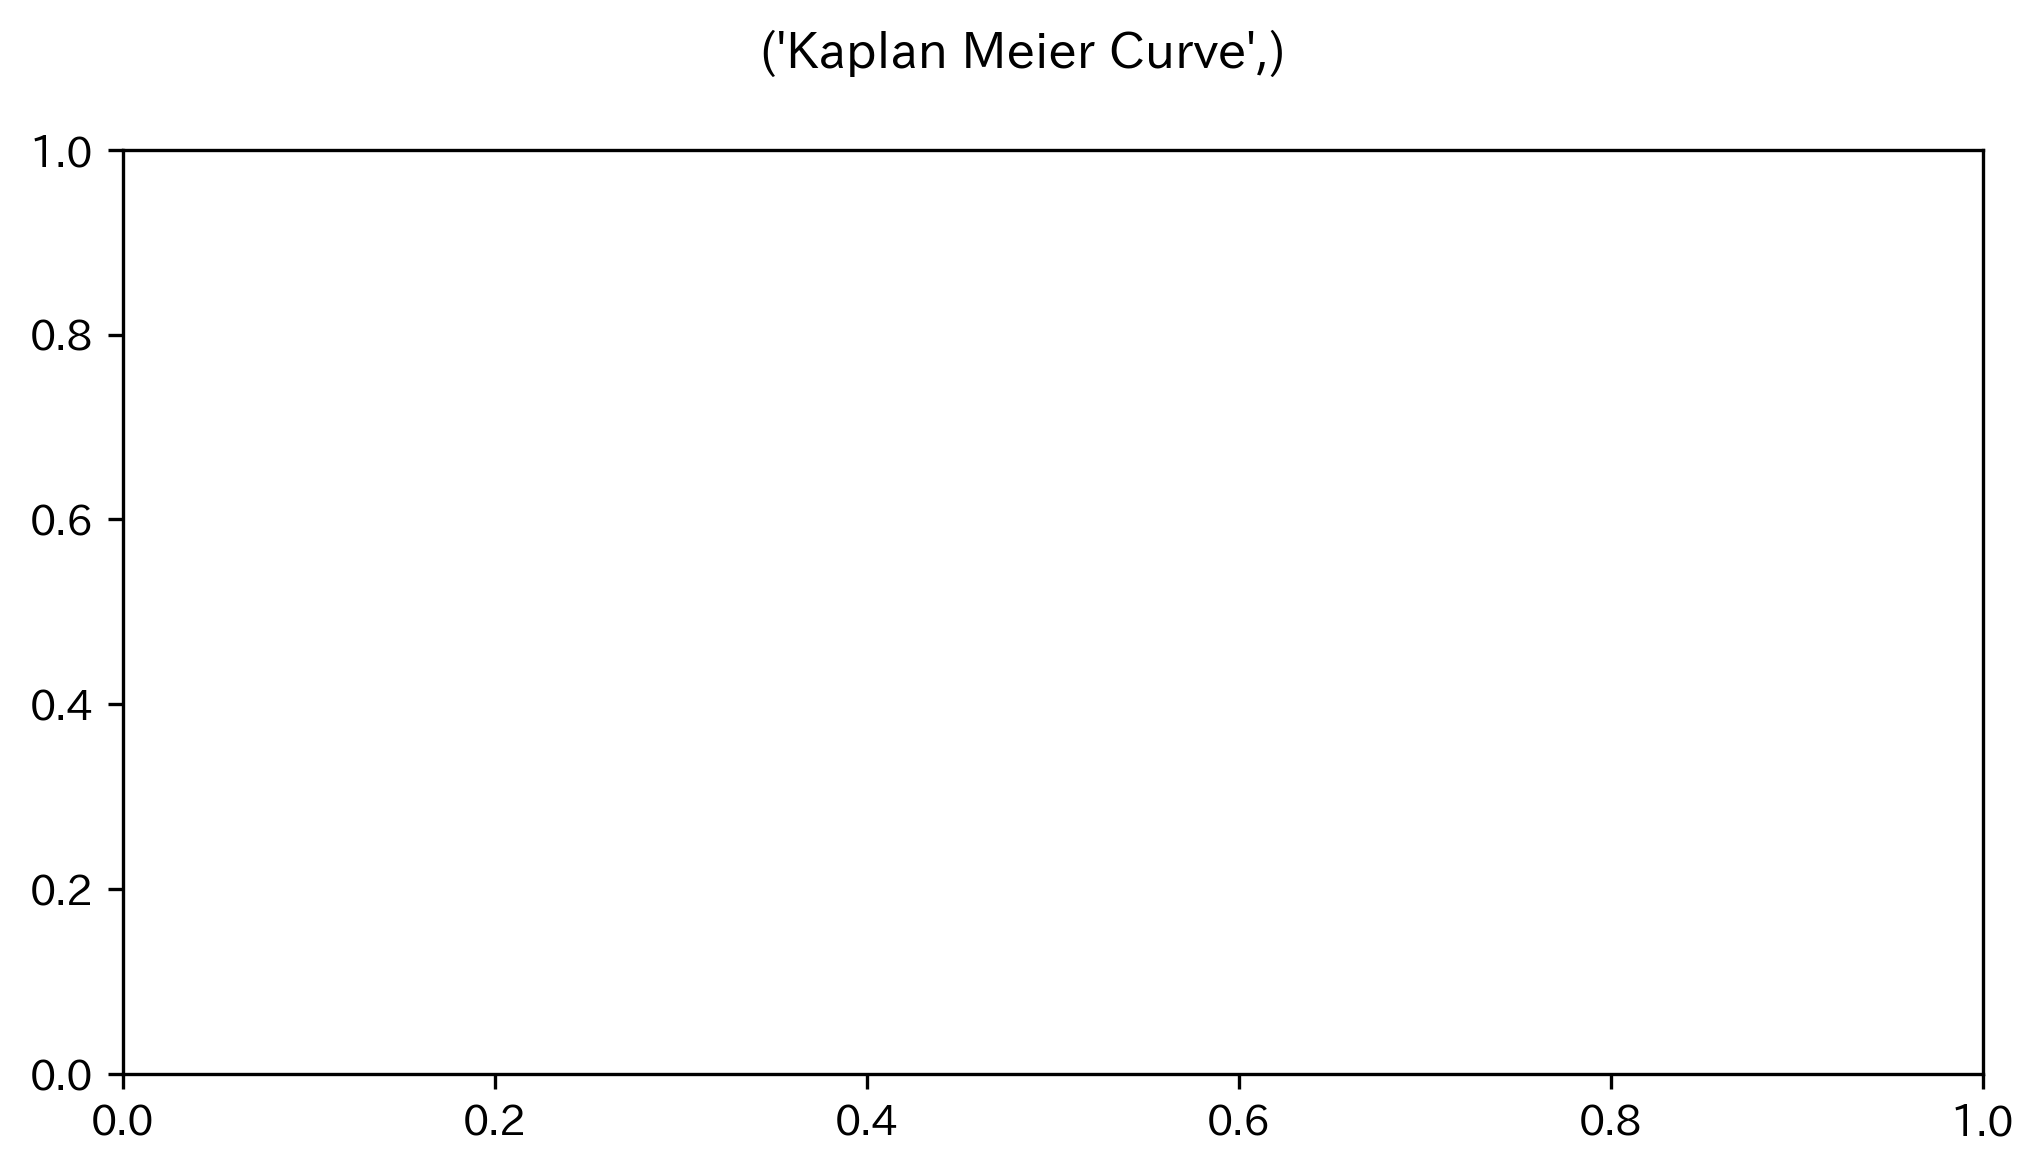

In [55]:
subgroup = list(set(df.subgroup))
fig, ax = plt.subplots(figsize=size, dpi=300)
plt.suptitle(title)

# kmfs = [] # at_riskを正しく表示するため、fitしたインスタンスをリストに格納する
# if (len(subgroup) > 0) and by_subgroup: 
#     for i, group in enumerate(subgroup):
#         df_ = df[df.subgroup==group]
#         kmf = KaplanMeierFitter()
#         event_observed = df_.event.values
#         if event_flag == 0:
#             event_observed = 1 - event_observed
#         kmf.fit(durations=df_.duration, event_observed=event_observed, label=group)
#         if color == 'gray':  
#             kmf.plot(show_censors=censor, ci_show=ci, color=color, 
#                         linestyle=style_list[i], censor_styles={"marker": "|", "ms": 6, "mew": 0.75}) # matplotlibのマーカーと同じ。ms:長さ、mew:太さ
#         else:
#             kmf.plot(show_censors=censor, ci_show=ci, 
#                         color=color[i], censor_styles={"marker": "|", "ms": 6, "mew": 0.75})
#         kmfs.append(kmf)
    
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     if at_risk:
#         add_at_risk_counts(*kmfs, rows_to_show=['At risk'])  # * でリストの中身を展開

#     fig.tight_layout()            
#     return fig
            

# else:
#     kmf = KaplanMeierFitter()
#     event_observed = df.event.values
#     if event_flag == 0:
#         event_observed = 1 - event_observed
#     kmf.fit(durations=df.duration, event_observed=event_observed)
#     if color == 'gray': 
#         kmf.plot(show_censors=censor, ci_show=ci, color=color, 
#                     label='_nolegend_', censor_styles={"marker": "|", "ms": 6, "mew": 0.75})
#     else:
#         kmf.plot(show_censors=censor, ci_show=ci, color=color[0], 
#                     label='_nolegend_', censor_styles={"marker": "|", "ms": 6, "mew": 0.75})
    
#     plt.gca.legend_ = None
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)  
#     if at_risk:
#         add_at_risk_counts(kmf, rows_to_show=['At risk'])

#     fig.tight_layout()

In [71]:
def generate_float_strings(x):
    if x <= 0:
        return []

    step = 0.1 / x
    result = [str(9 * (i * step)) for i in range(x)]
    return result

['0.0', '0.45']

In [75]:
def generate_float_strings(x):
    if x <= 0:
        return []

    step = 0.9 / (x - 1)  # x個の等間隔な数値を生成するためのステップ
    result = [str(i * step) for i in range(x)]
    return result

# 使用例
x = 3  # 3個の数値を生成
result_list = generate_float_strings(x)
print(result_list)

['0.0', '0.45', '0.9']


In [79]:
def generate_float_strings(x):
    if x <= 0:
        return []

    step = 0.9 / (x - 1)  # x個の等間隔な数値を生成するためのステップ
    result = [round(i * step, 3) for i in range(x)]
    result = [str(val) for val in result]  # 四捨五入した後に文字列に変換
    return result

# 使用例
x = 3  # 3個の数値を生成
result_list = generate_float_strings(x)
print(result_list)

['0.0', '0.45', '0.9']


In [89]:
'df_e' in locals() or 'df_e' in globals()

False

In [94]:
import numpy as np
a = np.inf
b = 1

In [95]:
b / a

0.0

In [3]:
from utils import heighlight_value

ImportError: cannot import name 'generate_grayscale' from partially initialized module 'utils' (most likely due to a circular import) (/Users/hiromimatsumoto/Library/CloudStorage/GoogleDrive-ocean.vntp@gmail.com/マイドライブ/Python_呼吸器/KaplanMeier_plotter/utils.py)

In [6]:
from utils import generate_grayscale, draw_km, median_duration, logrank_p_table, heighlight_value, hazard_table, download_button

In [55]:
def logrank_p_table(df, event_flag=1):
    subgroup = list(set(df.subgroup))
    subgroup_combi = list(combinations(subgroup, 2))

    logrank_ps = []
    wilcoxon_ps = []
    names = []
    for combi in subgroup_combi:
        c1 = df[df['subgroup']==combi[0]]
        c2 = df[df['subgroup']==combi[1]]
        
        event_observed_c1 = c1.event.values
        event_observed_c2 = c2.event.values
        if event_flag == 0:
            event_observed_c1 = 1 - event_observed_c1
            event_observed_c2 = 1 - event_observed_c2
        logrank = logrank_test(c1.duration, c2.duration, event_observed_c1, event_observed_c2)
        wilcoxon = logrank_test(c1.duration, c2.duration, event_observed_c1, event_observed_c2, 
                                weightings='wilcoxon')
        logrank_p = logrank.p_value
        wilcoxon_p = wilcoxon.p_value
        
        logrank_ps.append(logrank_p)
        wilcoxon_ps.append(wilcoxon_p)
        names.append(combi[0]+'/'+combi[1])
    p_df = pd.DataFrame({'subgroup':names, 'logrank-p':logrank_ps, 'wilcoxon-p':wilcoxon_ps})
    return p_df

In [56]:
logrank_p_table(df_e)

,subgroup,logrank-p,wilcoxon-p
0,Pembro+chemo/chemo,0.011747,0.009514
1,Pembro+chemo/Pembro,0.118665,0.308553
2,chemo/Pembro,0.156210,0.098061


In [37]:
set(df.subgroup)

{'Pembro+chemo'}

In [39]:
df_e

,duration,event,subgroup
0,211.634150,1,Pembro
1,53.959131,0,Pembro
2,156.279203,0,Pembro
3,301.057047,0,Pembro
4,201.144882,0,Pembro
...,...,...,...
144,174.684810,1,chemo
145,122.375505,1,chemo
146,3.869460,0,chemo
147,107.193009,1,chemo
